<a href="https://colab.research.google.com/github/Justin-Paul-2001/Internship_Projects/blob/master/MultiLinear_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORTING ALL IMPORTANT LIBRARIES
1.) Numpy

2.) Pandas

3.) Seaborn and Matplotlib for Visualation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (15, 10)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## LOADING THE REQUIRED DATASET and PRELIMINARY VISUALIZATION OF DATABASE

In [2]:
advert = pd.read_csv('Advertising.csv')
print(advert.head())
print("\n")
print(advert.info())

      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


## VISUALIZATION DATA USING SEABORN

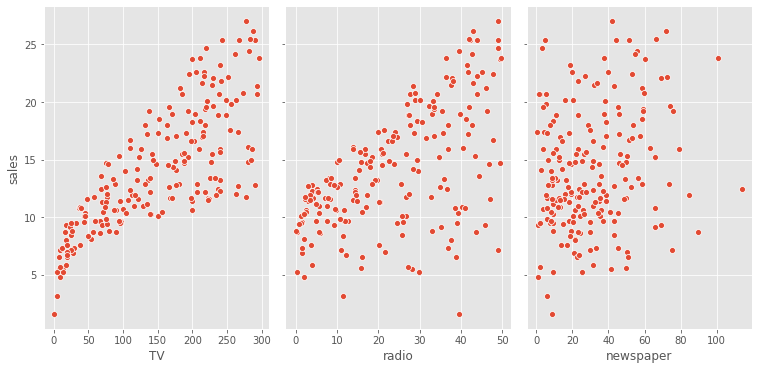

In [3]:
sns.pairplot(advert, x_vars=['TV','radio','newspaper'], y_vars='sales', height=5, aspect=0.7);

## CREATING THE LINEAR REGRESSION MODEL

In [4]:
from sklearn.linear_model import LinearRegression

feature_columns = ['TV', 'radio', 'newspaper']
X = advert[feature_columns]
y = advert.sales

# Fitting the First Linear Regression Model (lm1)
lm1 = LinearRegression()
lm1.fit(X, y)

print("Value of Bias is : ")
print(lm1.intercept_)
print("\nValue of Coefficients beta1 , beta2 and beta3 : ")
print(lm1.coef_)

Value of Bias is : 
2.938889369459412

Value of Coefficients beta1 , beta2 and beta3 : 
[ 0.04576465  0.18853002 -0.00103749]


## FINDING CORRELATIONS BETWEEN INPUT and OUTPUT FEATURES 

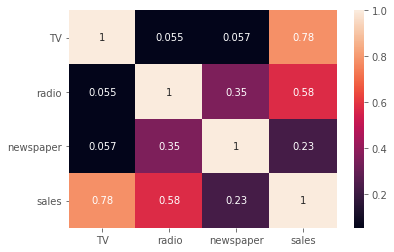

In [5]:
sns.heatmap(advert.corr(), annot=True)

## PREDICTING USING LINEAR REGRESSION and FINDING ACCURACY USING THE R^2 SCORE And RMSE:

In [6]:
from sklearn.metrics import r2_score , mean_squared_error

lm1_preds = lm1.predict(X[['TV', 'radio', 'newspaper']])

print("Root Mean Square Error {RMSE} :", np.sqrt(mean_squared_error(y, lm1_preds)))
print("R-square {R^2} score : ",r2_score(y, lm1_preds))

Root Mean Square Error {RMSE} : 1.6685701407225697
R-square {R^2} score :  0.8972106381789522


## CREATING SECOND LINEAR REGRESSION MODEL WITHOUT THE "Newspaper" as an INPUT COLUMN

In [7]:
lm2 = LinearRegression().fit(X[['TV', 'radio']], y)
lm2_preds = lm2.predict(X[['TV', 'radio']])

print("Root Mean Square Error {RMSE} :", np.sqrt(mean_squared_error(y, lm2_preds)))
print("R-square {R^2} score : ", r2_score(y, lm2_preds))

Root Mean Square Error {RMSE} : 1.6687030593661927
R-square {R^2} score :  0.8971942610828957


## CREATING THIRD LINEAR REGRESSION MODEL using the "Train-Test Split" And PREDICTING THE ACCURACY THROUGH R^2 SCORE And RMSE:

In [8]:
from sklearn.model_selection import train_test_split

X = advert[['TV', 'radio']]
y = advert.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm3 = LinearRegression()
lm3.fit(X_train, y_train)
lm3_preds = lm3.predict(X_test)

print("Root Mean Square Error {RMSE} :", np.sqrt(mean_squared_error(y_test, lm3_preds)))
print("R-square {R^2} score : ", r2_score(y_test, lm3_preds))

Root Mean Square Error {RMSE} : 1.3879034699382888
R-square {R^2} score :  0.9176214942248907


## VISUALIZATION THE LINEAR REGRESSION MODEL THROUGH THE "Yellowbrick.Regressor" LIBRARY:

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


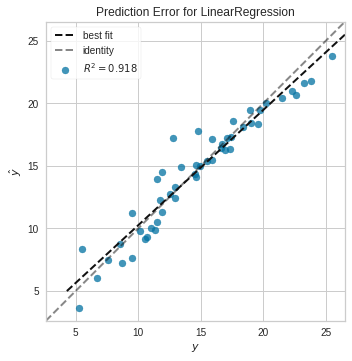

In [9]:




from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(lm3)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof() 

## CREATING FOURTH LINEAR REGRESSION MODEL using the "Train-Test Split" And PREDICTING THE ACCURACY THROUGH R^2 SCORE And RMSE BUT TAKING INTO ACCOUNT THE SYNERGY EFFECT :

In [10]:
advert['interaction'] = advert['TV'] * advert['radio']
X = advert[['TV', 'radio', 'interaction']]
y = advert.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
lm4 = LinearRegression()
lm4.fit(X_train, y_train)
lm4_preds = lm4.predict(X_test)

print("Root Mean Square Error {RMSE} :", np.sqrt(mean_squared_error(y_test, lm4_preds)))
print("R-square {R^2} score : ", r2_score(y_test, lm4_preds))

Root Mean Square Error {RMSE} : 0.7011871137164328
R-square {R^2} score :  0.978973681468126


## VISUALIZATION THE FOURTH LINEAR REGRESSION MODEL THROUGH THE "Yellowbrick.Regressor" LIBRARY:

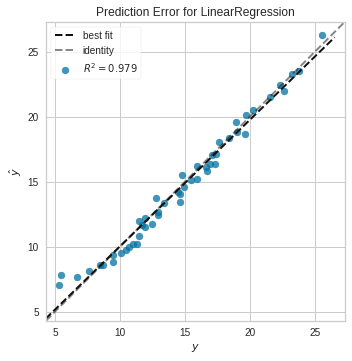

In [11]:



visualizer = PredictionError(lm4)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()